#### Imports

In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import transform


#### Fonctions utilitaires pour parcourir les images

In [2]:
common_path = "./chest_Xray"
images_files = os.listdir(common_path)
subfolders = ["train","val","test"]
categories = ["NORMAL","PNEUMONIA"]

def browse_imgs(img_callback, path_folder_callback = None, limit_size = None):
    for subfolder in subfolders:
        for category in categories:
            folder_path = os.path.join(common_path, subfolder, category)
            images_files = os.listdir(folder_path)
            if path_folder_callback is not None:
                path_folder_callback(folder_path, images_files)
            array_limit = limit_size if limit_size is not None else len(images_files)
            for file_name in images_files[:array_limit]:
                if not file_name.endswith(".jpeg"):
                    continue
                image_path = os.path.join(folder_path,file_name)
                img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                img_callback(img, category, file_name)  # Pass file_name as an additional argument

In [35]:
all_images = []
all_categories = []

datasetX = []
datasetY = []

image_size = (200, 200)

def load_datasets(img, category, file_name):
    if category == "PNEUMONIA":
        if "virus" in file_name:
            category = "VIRUS PNEUMONIA"
        elif "bacteria" in file_name:
            category = "BACTERIA PNEUMONIA"
    else:
        category = "NORMAL"
    
    new_img = cv2.resize(img, image_size)
    all_images.append(new_img)
    all_categories.append(category)

browse_imgs(load_datasets)

##### Doubler le dataset d'images NORMAL

In [36]:
# Définir une fonction pour effectuer une rotation d'image
def rotate_image(image, angle):
    return transform.rotate(image, angle)

# Définir une fonction pour effectuer un retournement horizontal d'image
def flip_image(image):
    return image[:, ::-1]

normal_indice = []
print("Normal indices size : ", len(normal_indice))

# Créer une liste pour stocker les indices des images "NORMAL"
normal_indice = [i for i, category in enumerate(all_categories) if category == "NORMAL"]

print("Normal indices size : ", len(normal_indice))

# Pour chaque image "NORMAL"...
for i in normal_indice:
    img = all_images[i]

    # Effectuer une rotation de 20 degrés, redimensionner l'image et l'ajouter à la liste de toutes les images
    rotated_img = rotate_image(img, 20)
    resized_rotated_img = cv2.resize(rotated_img, image_size)
    all_images.append(resized_rotated_img)
    all_categories.append("NORMAL")

    # Effectuer un retournement horizontal, redimensionner l'image et l'ajouter à la liste de toutes les images
    flipped_img = flip_image(img)
    resized_flipped_img = cv2.resize(flipped_img, image_size)
    all_images.append(resized_flipped_img)
    all_categories.append("NORMAL")

# Convert the list of all images to a numpy array
datasetX = np.array(all_images)

def use_all_dataset():
    global datasetX, datasetY
    datasetX = np.array(all_images)
    datasetY = np.array(all_categories)

use_all_dataset()
print("Dataset all shape : ", datasetX.shape)

Normal indices size :  0
Normal indices size :  1583
Dataset all shape :  (9022, 200, 200)


#### Doubler le datase d'images "virus pneumonia"

In [37]:
# Créer une liste pour stocker les indices des images "VIRUS PNEUMONIA"
virus_pneumonia_indices = [i for i, category in enumerate(all_categories) if category == "VIRUS PNEUMONIA"]

print("VIRUS PNEUMONIA indices size : ", len(virus_pneumonia_indices))

# Pour chaque image "VIRUS PNEUMONIA"...
for i in virus_pneumonia_indices:
    img = all_images[i]

    # Effectuer une rotation de 20 degrés, redimensionner l'image et l'ajouter à la liste de toutes les images
    rotated_img = rotate_image(img, 20)
    resized_rotated_img = cv2.resize(rotated_img, image_size)
    all_images.append(resized_rotated_img)
    all_categories.append("VIRUS PNEUMONIA")

    # Effectuer un retournement horizontal, redimensionner l'image et l'ajouter à la liste de toutes les images
    flipped_img = flip_image(img)
    resized_flipped_img = cv2.resize(flipped_img, image_size)
    all_images.append(resized_flipped_img)
    all_categories.append("VIRUS PNEUMONIA")

# Convertir la liste de toutes les images en un tableau numpy
datasetX = np.array(all_images)
datasetY = np.array(all_categories)  # Assurez-vous que cette conversion est nécessaire pour votre cas d'utilisation

print("Dataset all shape : ", datasetX.shape)

VIRUS PNEUMONIA indices size :  1493
Dataset all shape :  (12008, 200, 200)


#### Doubler le dataset d'images "BACTERIA PNEUMONIA"

In [38]:
# Créer une liste pour stocker les indices des images "BACTERIA PNEUMONIA"
bacteria_pneumonia_indices = [i for i, category in enumerate(all_categories) if category == "BACTERIA PNEUMONIA"]

print("BACTERIA PNEUMONIA indices size : ", len(bacteria_pneumonia_indices))

# Pour chaque image "BACTERIA PNEUMONIA"...
for i in bacteria_pneumonia_indices:
    img = all_images[i]

    # Effectuer une rotation de 20 degrés, redimensionner l'image et l'ajouter à la liste de toutes les images
    rotated_img = rotate_image(img, 20)
    resized_rotated_img = cv2.resize(rotated_img, image_size)
    all_images.append(resized_rotated_img)
    all_categories.append("BACTERIA PNEUMONIA")

    # Effectuer un retournement horizontal, redimensionner l'image et l'ajouter à la liste de toutes les images
    flipped_img = flip_image(img)
    resized_flipped_img = cv2.resize(flipped_img, image_size)
    all_images.append(resized_flipped_img)
    all_categories.append("BACTERIA PNEUMONIA")

# Convertir la liste de toutes les images en un tableau numpy
datasetX = np.array(all_images)
datasetY = np.array(all_categories)

print("Dataset all shape : ", datasetX.shape)

BACTERIA PNEUMONIA indices size :  2780
Dataset all shape :  (17568, 200, 200)


#### Fonction Display distribution

In [39]:
def display_distribution(ytrain, testy, label_encoder):
    categories = ['NORMAL', 'VIRUS PNEUMONIA', 'BACTERIA PNEUMONIA']
    # Convert numeric labels back to categorical for display
    ytrain_cat = label_encoder.inverse_transform(ytrain)
    testy_cat = label_encoder.inverse_transform(testy)
    
    test_counts = [np.count_nonzero(testy_cat == category) for category in categories]
    train_counts = [np.count_nonzero(ytrain_cat == category) for category in categories]
    
    # Plot the distribution graphs
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Adjusted subplot count to 2 as only two plots are needed
    ax[0].bar(categories, train_counts)
    ax[0].set_title("Train Distribution")
    ax[1].bar(categories, test_counts)  # Adjusted index to 1 for the second plot
    ax[1].set_title("Test Distribution")
    plt.show()

#### Machine Learning

##### Resize and Flatten Transformers

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [28]:
class ResizeImageTransformer():
    def __init__(self, size):
        self.size = size
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = np.array([cv2.resize(img, self.size) for img in X])
        return X

class FlattenTransformer():    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.reshape(len(X), -1)
        return X

In [40]:
general_scoring = {
    "recall": make_scorer(recall_score, average='macro'),
    "precision": make_scorer(precision_score, average='macro'),
    # "f1": make_scorer(f1_score, average='macro')
}

In [41]:
def cross_val(model, scoring, nb_folds=6, verbose=3):
    res = cross_validate(model, datasetX, datasetY, cv=nb_folds, scoring=scoring, error_score="raise", return_train_score=True, verbose=verbose)
    res.pop("fit_time")
    res.pop("score_time")
    return res

In [42]:
model = make_pipeline(
    ResizeImageTransformer(size=(200,200)),
    FlattenTransformer(),
    KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='brute')
)

# Encoder les étiquettes
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(all_categories)
datasetY = np.array(numeric_labels)

print("numeric labels : ", numeric_labels)
print("Numeric labels shape : ", datasetY.shape)

def use_all_dataset():
    global datasetX, datasetY
    datasetX = np.array(all_images)
    datasetY = np.array(numeric_labels)

scores = cross_val(model, general_scoring)
df = pd.DataFrame(scores)
df

numeric labels :  [1 1 1 ... 0 0 0]
Numeric labels shape :  (17568,)


In [32]:
# Calcul de la moyenne pour chaque métrique sur tous les plis
print(df.mean())

test_recall        0.780339
train_recall       1.000000
test_precision     0.792983
train_precision    1.000000
dtype: float64


In [33]:
trainx, testx, trainy, testy = train_test_split(datasetX, datasetY, test_size=0.2, random_state=1)

print("Train X shape : ", trainx.shape)
print("Train Y shape : ", trainy.shape)
print("Test X shape : ", testx.shape)
print("Test Y shape : ", testy.shape)

Train X shape :  (9606, 200, 200)
Train Y shape :  (9606,)
Test X shape :  (2402, 200, 200)
Test Y shape :  (2402,)


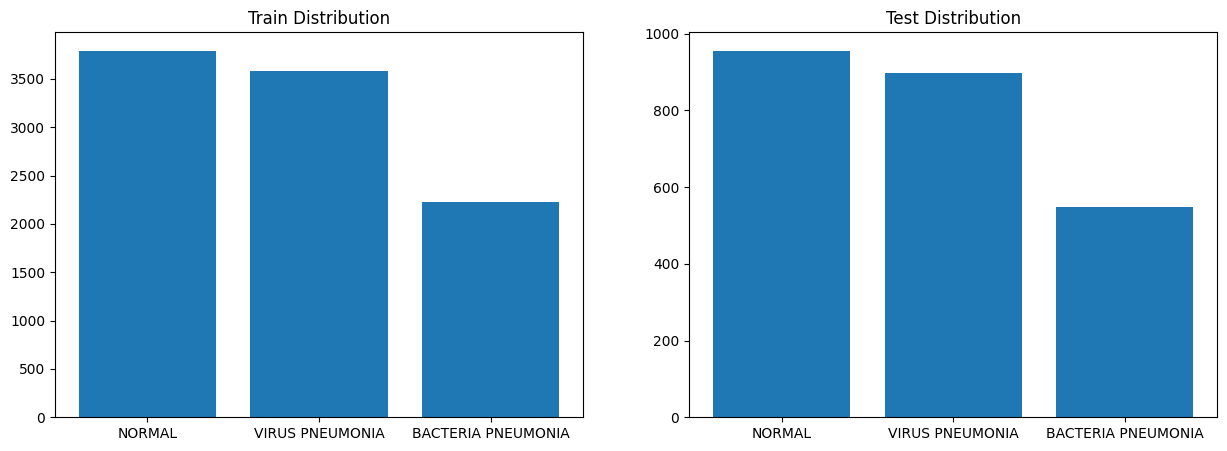

Recall (macro) :  0.7992747722406522
Precision (macro) :  0.7920018434724317


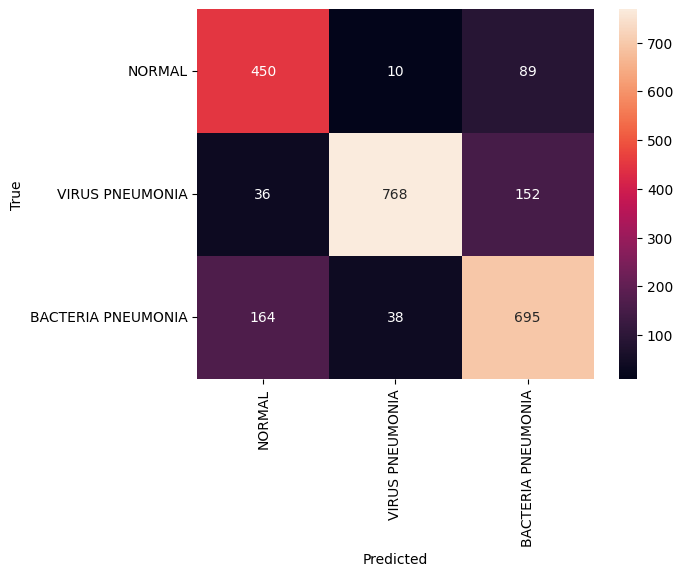

In [34]:
model.fit(trainx, trainy)

y_pred = model.predict(testx)

display_distribution(trainy, testy, label_encoder)

recall = recall_score(testy, y_pred, average='macro')
precision = precision_score(testy, y_pred, average='macro')
# f1score = f1_score(testy, y_pred, average='macro')
print("Recall (macro) : ", recall)
print("Precision (macro) : ", precision)
# print("F1 Score (macro) : ", f1score)

# cm = confusion_matrix(testy, y_pred)
# sns.heatmap(cm, annot=True, fmt="d")
# plt.show()

labels = ['NORMAL', 'VIRUS PNEUMONIA', 'BACTERIA PNEUMONIA']

# Calcul de la matrice de confusion
cm = confusion_matrix(testy, y_pred)

# Affichage de la matrice de confusion avec les vrais labels
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Classification Report

In [14]:
from sklearn.metrics import classification_report

# Génération du rapport de classification
report = classification_report(testy, y_pred, target_names=labels)
print(report)

                    precision    recall  f1-score   support

            NORMAL       0.73      0.85      0.78       560
   VIRUS PNEUMONIA       0.95      0.87      0.91       638
BACTERIA PNEUMONIA       0.60      0.50      0.55       290

          accuracy                           0.79      1488
         macro avg       0.76      0.74      0.75      1488
      weighted avg       0.80      0.79      0.79      1488



#### GridSearchCV

In [17]:
param_grid = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 20, 1),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['brute', 'auto'] # , 'ball_tree', 'kd_tree'
}

In [18]:
model_grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=4, scoring=make_scorer(recall_score, average='macro'),
    verbose=3)
use_all_dataset()
model_grid_search.fit(datasetX, datasetY)
model_grid_search.best_params_

Fitting 4 folds for each of 76 candidates, totalling 304 fits
[CV 1/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.629 total time=   4.8s
[CV 2/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.630 total time=   5.0s
[CV 3/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.736 total time=   4.6s
[CV 4/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform;, score=0.702 total time=   4.4s
[CV 1/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance;, score=0.629 total time=   4.3s
[CV 2/4] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance;, score=0

recall :  1.0
precision :  1.0
f1score :  1.0


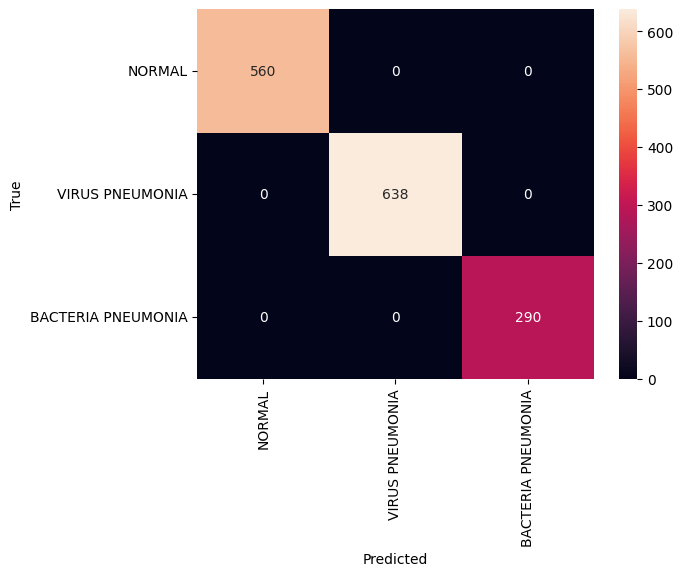

In [33]:
y_pred = model_grid_search.predict(testx)
recall = recall_score(testy, y_pred, average='macro')
precision = precision_score(testy, y_pred, average='macro')
f1score = f1_score(testy, y_pred, average='macro')
print("recall : ", recall)
print("precision : ", precision)
print("f1score : ", f1score)

labels = ['NORMAL', 'VIRUS PNEUMONIA', 'BACTERIA PNEUMONIA']  # Remplacez 'Label1', 'Label2', 'Label3' par vos vrais labels

# Calcul de la matrice de confusion
cm = confusion_matrix(testy, y_pred)

# Affichage de la matrice de confusion avec les vrais labels
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
model.get_params()

{'memory': None,
 'steps': [('resizeimagetransformer',
   <__main__.ResizeImageTransformer at 0x25ed8f5f110>),
  ('flattentransformer', <__main__.FlattenTransformer at 0x25ed901dfa0>),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))],
 'verbose': False,
 'resizeimagetransformer': <__main__.ResizeImageTransformer at 0x25ed8f5f110>,
 'flattentransformer': <__main__.FlattenTransformer at 0x25ed901dfa0>,
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=11),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

#### Learning Curve

[learning_curve] Training set sizes: [ 396  793 1190 1586 1983 2380 2776 3173 3570 3967]
[CV] END ..................., score=(train=1.000, test=0.747) total time=   0.5s
[CV] END ..................., score=(train=1.000, test=0.771) total time=   0.8s
[CV] END ..................., score=(train=1.000, test=0.771) total time=   1.1s
[CV] END ..................., score=(train=1.000, test=0.775) total time=   1.3s
[CV] END ..................., score=(train=1.000, test=0.781) total time=   1.5s
[CV] END ..................., score=(train=1.000, test=0.784) total time=   1.9s
[CV] END ..................., score=(train=1.000, test=0.786) total time=   2.0s
[CV] END ..................., score=(train=1.000, test=0.787) total time=   2.4s
[CV] END ..................., score=(train=1.000, test=0.790) total time=   2.6s
[CV] END ..................., score=(train=1.000, test=0.788) total time=   2.8s
[CV] END ..................., score=(train=1.000, test=0.757) total time=   0.5s
[CV] END ...........

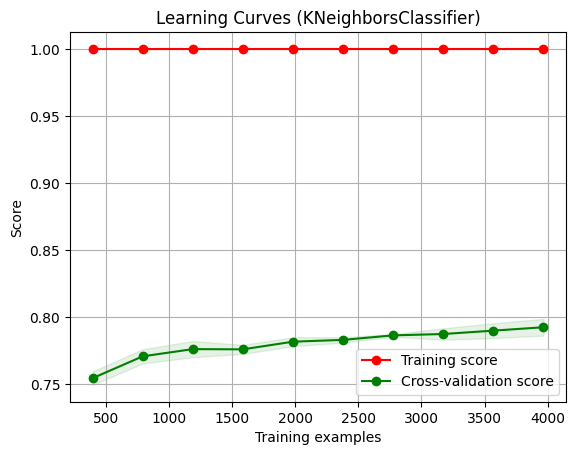

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), verbose=3):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Tracer les courbes d'apprentissage
plot_learning_curve(model, "Learning Curves (KNeighborsClassifier)", trainx, trainy, cv=3, verbose=3)
plt.show()

#### CNN - Convolution Neural Network

##### Les imports

In [13]:
import visualkeras as vk
import pandas as pd
# from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical

##### Le modèle

Convolution = mettre en évidence les caractéristiques de l'image.

Poolling = réduire l'image.

In [9]:
num_classes = 3
core_size = 2

model = tf.keras.Sequential([
    layers.Input(shape=(200, 200, 1)),
    layers.Conv2D(32, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, core_size, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# model.summary()

##### L'entrainement

In [10]:
# model.compile(optimizer='adam',
#               loss=tf.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['recall', 'precision'])

# 2ème méthode de compilation qui permet de configurer des paramètres supplémentaires lors de l'instanciation
# si nécessaire
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [7]:
def display_distribution(ytrain, yval, testy):
    test = (np.count_nonzero(testy == "NORMAL"), np.count_nonzero(testy == "PNEUMONIA"))
    train = (np.count_nonzero(ytrain == "NORMAL"), np.count_nonzero(ytrain == "PNEUMONIA"))
    val = (np.count_nonzero(yval == "NORMAL"), np.count_nonzero(yval == "PNEUMONIA"))
    
    # Tracer les graphiques de distribution
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].bar(["NORMAL", "PNEUMONIA"], train)
    ax[0].set_title("Train Distribution")
    ax[1].bar(["NORMAL", "PNEUMONIA"], val)
    ax[1].set_title("Validation Distribution")
    ax[2].bar(["NORMAL", "PNEUMONIA"], test)
    ax[2].set_title("Test Distribution")
    plt.show()

In [14]:
# Convert the list of all images to a numpy array
datasetX = np.array(all_images)
datasetY = np.array(all_categories)

xtrain, otherX, ytrain, otherY = train_test_split(datasetX, datasetY, test_size=0.2, random_state=1)
xval, testx, yval, testy = train_test_split(otherX, otherY, test_size=0.5, random_state=1)

xtrain = xtrain / 255
testx = testx / 255
xval = xval / 255

print(xtrain.shape)
print(testx.shape)
print(xval.shape)
# display_distribution(ytrain, yval, testy)

# Convert labels to numeric values
label_to_index = {"NO PNEUMONIA": 0, "VIRUS PNEUMONIA": 1, "BACTERIA PNEUMONIA": 2}
ytrain = np.array([label_to_index[y] for y in ytrain])
testy = np.array([label_to_index[y] for y in testy])
yval = np.array([label_to_index[y] for y in yval])

model.fit(xtrain,
    ytrain_one_hot,
    validation_data=(xval, yval_one_hot),
    epochs=2)

(4684, 200, 200)
(586, 200, 200)
(586, 200, 200)
Epoch 1/2


AttributeError: 'NoneType' object has no attribute 'items'

In [49]:
print(model.evaluate(testx, testy))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1050 - precision_4: 0.9250 - recall_4: 0.9789
[0.1058962270617485, 0.976190447807312, 0.9360730648040771]


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


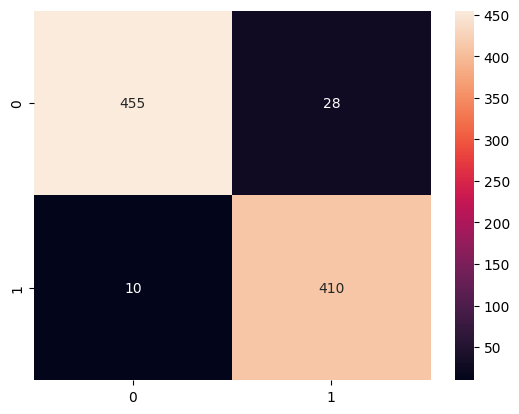

[[455  28]
 [ 10 410]]
recall :  0.9761904761904762
precision :  0.9360730593607306
f1score :  0.9557109557109557


In [50]:
y_pred = model.predict(testx)

y_pred_label = np.round(y_pred).astype(int)

cm = confusion_matrix(testy, y_pred_label)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(cm)
recall = recall_score(testy, y_pred_label)
precision = precision_score(testy, y_pred_label)
f1score = f1_score(testy, y_pred_label)
print("recall : ", recall)
print("precision : ", precision)
print("f1score : ", f1score)

#### Validation curve core_size

In [84]:
use_all_dataset()

trainx, testx, trainy, testy = train_test_split(datasetX, datasetY, test_size=0.2, random_state=1)
xtrain, xval, ytrain, yval = train_test_split(trainx, trainy, test_size=0.2, random_state=1)

xtrain = xtrain / 255
print("xtrain normalized")
testx = testx / 255
xval = xval / 255

print(trainx.shape)
print(testx.shape)
print(xval.shape)

# For datasetY replace normal with 0 and pneumonia with 1 in order to have numeric values
ytrain = np.array([0 if y == "NORMAL" else 1 for y in ytrain])
testy = np.array([0 if y == "NORMAL" else 1 for y in testy])
yval = np.array([0 if y == "NORMAL" else 1 for y in yval])

xtrain normalized
(4684, 200, 200)
(1172, 200, 200)
(937, 200, 200)


start validation_curve
Epoch 1/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - loss: 0.5753 - recall: 0.9270
Epoch 2/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.3303 - recall: 0.9676
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step
Epoch 1/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - loss: 0.5681 - recall: 0.9626
Epoch 2/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.3109 - recall: 0.9753
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step
Epoch 1/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - loss: 0.5327 - recall: 0.9888
Epoch 2/2
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - loss: 0.3217 - recall: 0.9679
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step
end validation_curve


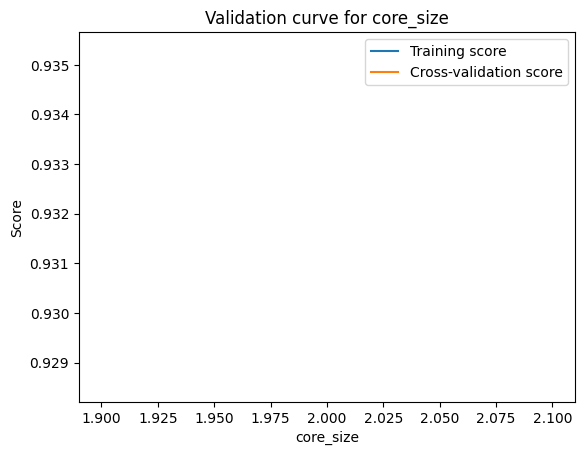

In [85]:
from sklearn.model_selection import validation_curve

# Define a function to create a model with a given core_size
def create_model(core_size):
    model = tf.keras.Sequential([
        layers.Input(shape=(200, 200, 1)),
        layers.Conv2D(64, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(62, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(16, core_size, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall'])
    return model

# Wrap the model in a KerasClassifier
model = KerasClassifier(model=create_model, verbose=1, core_size=2, epochs=2)

# Define the range of core_sizes to evaluate
core_sizes = [2, 4, 6, 8]

print("start validation_curve")
# Compute the validation curve
train_scores, valid_scores = validation_curve(
    model, xtrain, ytrain, param_name="core_size", param_range=core_sizes, cv=3, scoring="recall"
)
print("end validation_curve")

plt.figure()
plt.plot(core_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(core_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for core_size')
plt.xlabel('core_size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [96]:
from sklearn.model_selection import cross_validate
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

# Define a function to create a model with a given core_size
def create_model(core_size):
    model = tf.keras.Sequential([
        layers.Input(shape=(200, 200, 1)),
        layers.Conv2D(64, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(62, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(16, core_size, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall'])
    return model

# Define the range of core_sizes to evaluate
core_sizes = [2, 4, 6, 8]

# Initialize lists to store scores
train_scores = []
valid_scores = []

print("start cross_validate")
# Compute the validation curve
for core_size in core_sizes:
    # Wrap the model in a KerasClassifier with the current core_size
    model = KerasClassifier(build_fn=partial(create_model, core_size=core_size), verbose=1, epochs=2)
    scores = cross_validate(model, xtrain, ytrain, cv=3, scoring="recall", return_train_score=True)
    train_scores.append(scores['train_score'])
    valid_scores.append(scores['test_score'])
print("end cross_validate")

plt.figure()
plt.plot(core_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(core_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for core_size')
plt.xlabel('core_size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

#### Validation curve epoch

118/118 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - loss: 0.5630 - recall: 0.9976 - val_loss: 0.3436 - val_recall: 0.9688
Epoch 1/2
118/118 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - loss: 0.6064 - recall: 1.0000 - val_loss: 0.4985 - val_recall: 0.7054
Epoch 2/2
118/118 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - loss: 0.4818 - recall: 0.9427 - val_loss: 0.2464 - val_recall: 0.9449
Epoch 1/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 116s 977ms/step - loss: 0.5722 - recall: 0.9824 - val_loss: 0.3778 - val_recall: 0.9792
Epoch 2/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 777s 7s/step - loss: 0.2803 - recall: 0.9354 - val_loss: 0.2742 - val_recall: 0.9777
Epoch 3/3
118/118 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - loss: 0.2302 - recall: 0.9498 - val_loss: 0.2764 - val_recall: 0.8988
Epoch 1/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 107s 886ms/step - loss: 0.6085 - recall: 0.9314 - val_loss: 0.4198 - val_recall: 0.9762
Epoch 2/4
118/118 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - loss: 0.3105 - recall: 0.9209 - val_loss: 0.2789 - val_recall: 0.9568
Epoch 3/4
11

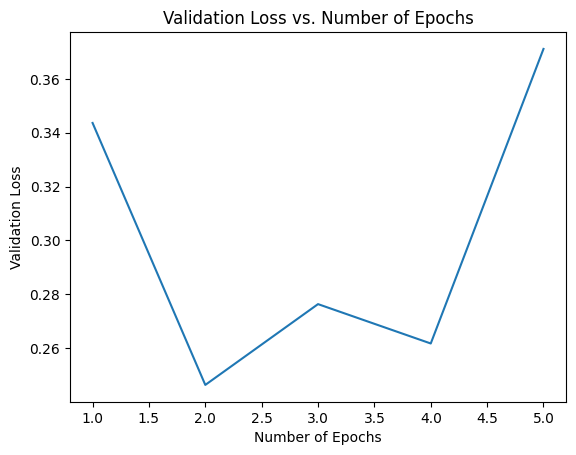

In [86]:
import matplotlib.pyplot as plt

# Liste pour stocker les scores de validation
val_scores = []
core_size = 8

# Liste des nombres d'epochs à tester
epochs_list = [1, 2, 3, 4, 5]

for epochs in epochs_list:
    # Créer un nouveau modèle pour chaque itération
    model = create_model(core_size)

    # Entraîner le modèle avec le nombre actuel d'epochs
    history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=epochs, verbose=1)

    # Obtenir le score de validation du dernier epoch et l'ajouter à la liste
    val_scores.append(history.history['val_loss'][-1])

# Tracer les scores de validation en fonction du nombre d'epochs
plt.plot(epochs_list, val_scores)
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Number of Epochs')
plt.show()